'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


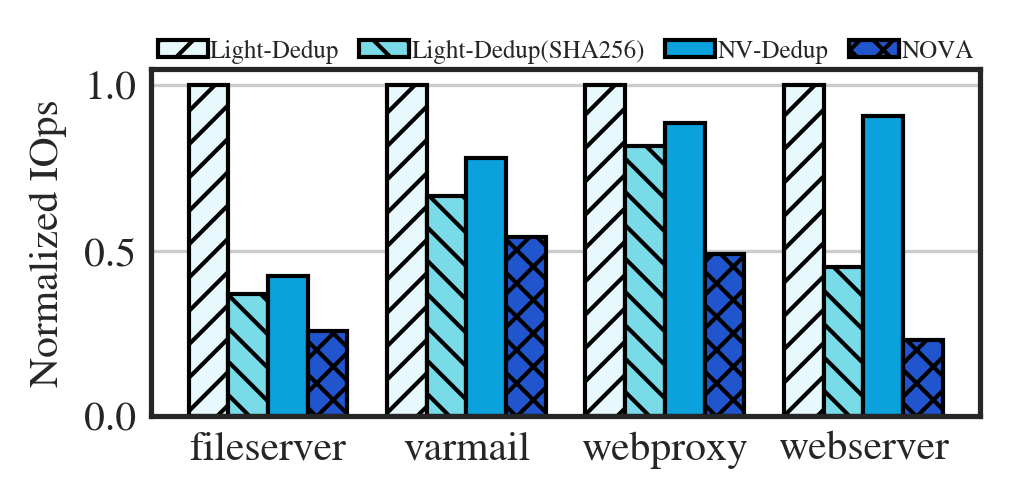

In [3]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
with open("./avg-test-result-in-paper", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4.5)))
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#E8F9FD", "#79DAE8", "#0AA1DD", "#2155CD"]
bar_width = 0.2
patterns = ['///', '\\\\\\', '', 'XXX']

file_benches = df["file_bench"].drop_duplicates().reset_index().drop(columns=['index'])['file_bench']
x_labels = ["fileserver", "varmail", "webproxy", "webserver"]
x = list(range(1, len(x_labels) + 1))
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
 
tot = len(fss) * bar_width
normalized_heights = []
for fb in file_benches:
    height = df[df['file_bench'] == fb]['iops'] / df[df['file_bench'] == fb]['iops'].max()
    normalized_heights.append(height)

for idx, fs in enumerate(fss):
    points = []
    for pivot in x:
        point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
        points.append(point)
    height = []
    for normalized_height in normalized_heights:
        height.append(normalized_height.iloc[idx])
    plt.bar(points, height, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx])
plt.yticks(np.arange(0, 1.1, 0.5))
plt.xticks(x, labels=x_labels)
        
# plt.bar(x, df["bw"] / 1024, color=colors_a[0], width=bar_width_a, edgecolor='black')
# plt.plot(x, df["bw"] / 1024, color='black', linestyle='dashed', linewidth=0.8, marker='o', markersize=2)
# plt.yticks(list(np.arange(0, 0.9, 0.2)))
# plt.xticks(x, labels=x_labels)
plt.ylabel("Normalized IOps")
plt.legend(fss, loc='center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize=6, columnspacing=0.8,handletextpad=0.1)
# subfig.text(0.5, -0.2, "Dup ratio (%)", ha='center', va='center', fontsize=7, transform=subfig.transAxes)
# plt.xlabel(title_a, fontsize = 8, labelpad = 8)


plt.tight_layout()
plt.savefig("./FIG-Filebench.pdf", bbox_inches='tight', pad_inches=0)
